In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv("../input/iris-flower-dataset/IRIS.csv")
df.head()

/kaggle/input/iris-flower-dataset/IRIS.csv


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Text(0, 0.5, 'sepal_length')

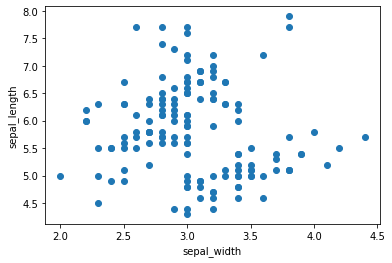

In [2]:
plt.scatter(df['sepal_width'],df['sepal_length'])
plt.xlabel('sepal_width')
plt.ylabel('sepal_length')

In [3]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['sepal_width','sepal_length']])
y_predicted
df['cluster']=y_predicted
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


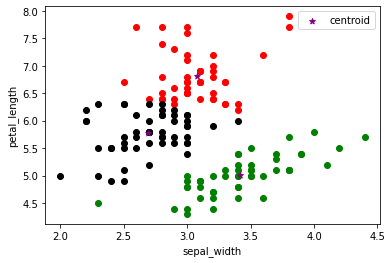

In [4]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.sepal_width,df1['sepal_length'],color='green')
plt.scatter(df2.sepal_width,df2['sepal_length'],color='red')
plt.scatter(df3.sepal_width,df3['sepal_length'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('sepal_width')
plt.ylabel('petal_length')
plt.legend()

In [5]:
#Preprocessing using min max scaler
scaler = MinMaxScaler()

scaler.fit(df[['sepal_width']])
df['sepal_width'] = scaler.transform(df[['sepal_width']])

scaler.fit(df[['sepal_length']])
df['sepal_length'] = scaler.transform(df[['sepal_length']])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,0.222222,0.625000,1.4,0.2,Iris-setosa,0
1,0.166667,0.416667,1.4,0.2,Iris-setosa,0
2,0.111111,0.500000,1.3,0.2,Iris-setosa,0
3,0.083333,0.458333,1.5,0.2,Iris-setosa,0
4,0.194444,0.666667,1.4,0.2,Iris-setosa,0


,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,0.222222,0.625000,1.4,0.2,Iris-setosa,1
1,0.166667,0.416667,1.4,0.2,Iris-setosa,1
2,0.111111,0.500000,1.3,0.2,Iris-setosa,1
3,0.083333,0.458333,1.5,0.2,Iris-setosa,1
4,0.194444,0.666667,1.4,0.2,Iris-setosa,1


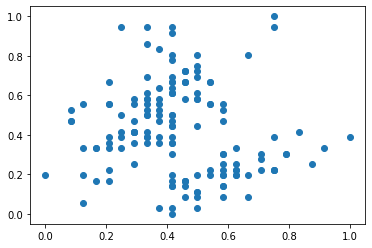

In [6]:
plt.scatter(df.sepal_width,df['sepal_length'])

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['sepal_width','sepal_length']])
y_predicted

df['cluster']=y_predicted
df.head()

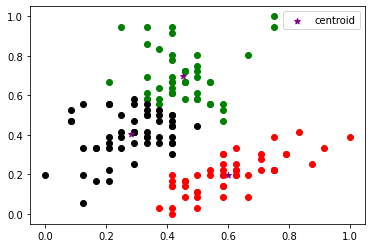

In [7]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.sepal_width,df1['sepal_length'],color='green')
plt.scatter(df2.sepal_width,df2['sepal_length'],color='red')
plt.scatter(df3.sepal_width,df3['sepal_length'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

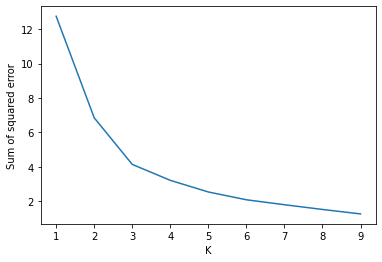

In [8]:
#Elbow Plot
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['sepal_width','sepal_length']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)